In [8]:
import numpy as np
import pyvista as pv
import omf
import omfvista as ov

In [9]:
proj = omf.Project(name='Test project', description='Just some assorted elements')

In [10]:
# Notes
'''

textures=[txt_pt, txt_sf, txt_vol] # list to reuse textures
an object can take multiple textures

the parameter 'location' can take these values : 'vertices', 'segments', 'faces', 'cells'

'''
print()

In [11]:
img='omf_img/Surface.png'

In [12]:
pts = omf.PointSetElement(
    name='Random Points',
    description='Just random points',
    geometry=omf.PointSetGeometry(vertices=np.random.rand(100, 3), origin=[50., 50., 50.],),
    data=[
        omf.ScalarData(
            name='rand data',
            array=np.random.rand(100),
            location='vertices'),
        
        omf.ScalarData(
            name='More rand data',
            array=np.random.rand(100),
            location='vertices')],
    
    textures=[
        omf.ImageTexture(
            name='test image',
            #image='test_image.png',
            image=img,
            origin=[0, 0, 0],
            axis_u=[1, 0, 0],
            axis_v=[0, 1, 0]),
        
        omf.ImageTexture(
            name='test image',
            image=img,
            #image='test_image.png',
            origin=[0, 0, 0],
            axis_u=[1, 0, 0],
            axis_v=[0, 0, 1])],
    
    color='green' # String
)

In [13]:
lin = omf.LineSetElement(
    name='Random Line',
    geometry=omf.LineSetGeometry(
        vertices=np.random.rand(100, 3),
        segments=np.floor(np.random.rand(50, 2)*100).astype(int)),
    
    data=[
        omf.ScalarData(
            name='rand vert data',
            array=np.random.rand(100),
            location='vertices'),
        
        omf.ScalarData(
            name='rand segment data',
            array=np.random.rand(50),
            location='segments')],
    
    color='#0000FF' # html
)

In [14]:
surf = omf.SurfaceElement(
    name='trisurf',
    geometry=omf.SurfaceGeometry(
        vertices=np.random.rand(100, 3),
        triangles=np.floor(np.random.rand(50, 3)*100).astype(int)),
    
    data=[
        omf.ScalarData(
            name='rand vert data',
            array=np.random.rand(100),
            location='vertices'),
        
        omf.ScalarData(
            name='rand face data',
            array=np.random.rand(50),
            location='faces')],
    
    color=[100, 200, 200] #RGB
)

In [15]:
grid = omf.SurfaceElement(
    name='gridsurf',
    geometry=omf.SurfaceGridGeometry(
        tensor_u=np.ones(10).astype(float),
        tensor_v=np.ones(15).astype(float),
        origin=[50., 50., 50.],
        axis_u=[1., 0, 0],
        axis_v=[0, 0, 1.],
        offset_w=np.random.rand(11, 16).flatten()),
    
    data=[
        omf.ScalarData(
            name='rand vert data',
            array=np.random.rand(11, 16).flatten(),
            location='vertices'),
        
        omf.ScalarData(
            name='rand face data',
            array=np.random.rand(10, 15).flatten(order='f'),
            location='faces')],
    
    textures=[
        omf.ImageTexture(
            name='test image',
            image=img,
            #image='test_image.png',
            origin=[2., 2., 2.],
            axis_u=[5., 0, 0],
            axis_v=[0, 2., 5.])]
)

In [16]:
vol = omf.VolumeElement(
    name='vol',
    geometry=omf.VolumeGridGeometry(
        tensor_u=np.ones(10).astype(float),
        tensor_v=np.ones(15).astype(float),
        tensor_w=np.ones(20).astype(float),
        origin=[10., 10., -10]
    ),
    
    data=[
        omf.ScalarData(
            name='Random Data',
            location='cells',
            array=np.random.rand(10, 15, 20).flatten())]
)

In [17]:
proj.elements = [pts, lin, surf, grid, vol]

assert proj.validate()

omf.OMFWriter(proj, 'omfproj.omf')

### Reading of omf project in a variable and convert elements to VTK objects

In [18]:
# Read all elements
reader = omf.OMFReader('omfproj.omf')
project = reader.get_project()

# Read all PointSets:
reader = omf.OMFReader('omfproj.omf')
project = reader.get_project_overview()
uids_to_import = [element.uid for element in project.elements
                  if isinstance(element, omf.PointSetElement)]
filtered_project = reader.get_project(uids_to_import)


# Iterate over the elements and add converted VTK objects to dictionary:
data = dict()
for e in project.elements:
    d = ov.wrap(e)
    data[e.name] = d

AttributeError: 'NoneType' object has no attribute 'vertices'

### or more simple

In [19]:
triDim = ov.load_project('omfproj.omf')
triDim

MultiBlock (0x7f31c6007f48)
  N Blocks:	5
  X Bounds:	0.004, 60.000
  Y Bounds:	-51.000, 25.000
  Z Bounds:	-10.000, 65.000

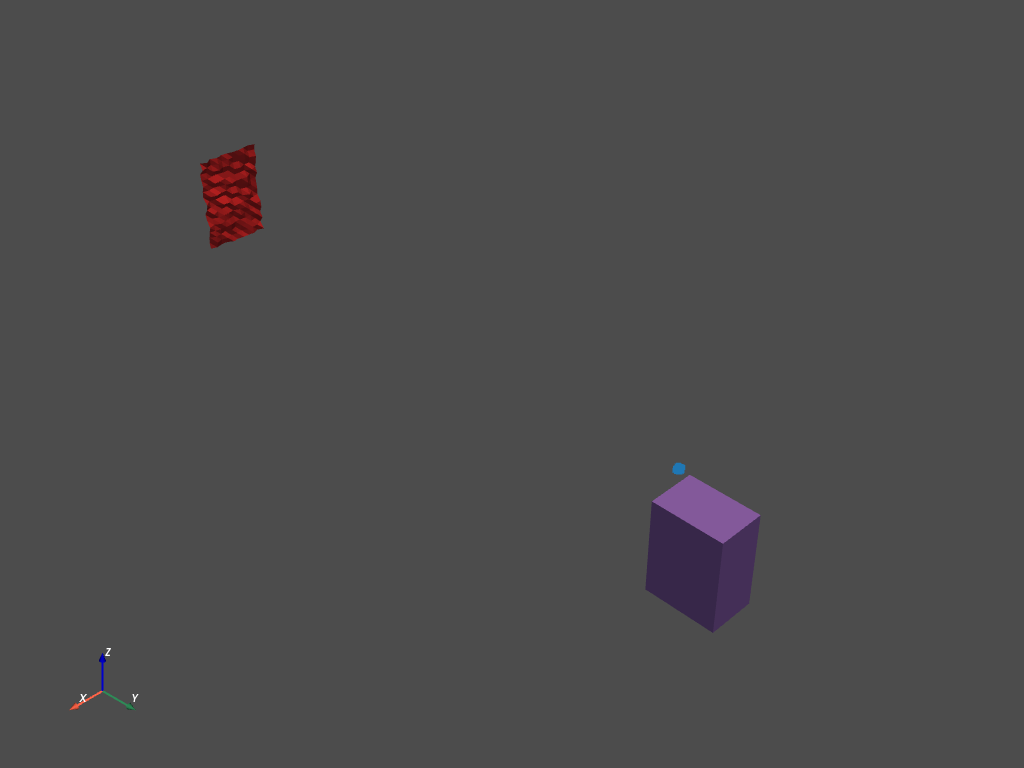

[(166.60689383987682, 123.60491615828965, 164.10490502866722),
 (30.001988811209596, -12.999988870377564, 27.5),
 (0.0, 0.0, 1.0)]

In [20]:
triDim.plot(multi_colors=True)

In [21]:
triDim

MultiBlock (0x7f31c6007f48)
  N Blocks:	5
  X Bounds:	0.004, 60.000
  Y Bounds:	-51.000, 25.000
  Z Bounds:	-10.000, 65.000

In [22]:
# Grab a few elements of interest and plot em up!
vol = triDim['vol']
gsf = triDim['gridsurf']
tsf = triDim['trisurf']
rl = triDim['Random Line']
rp = triDim['Random Points']

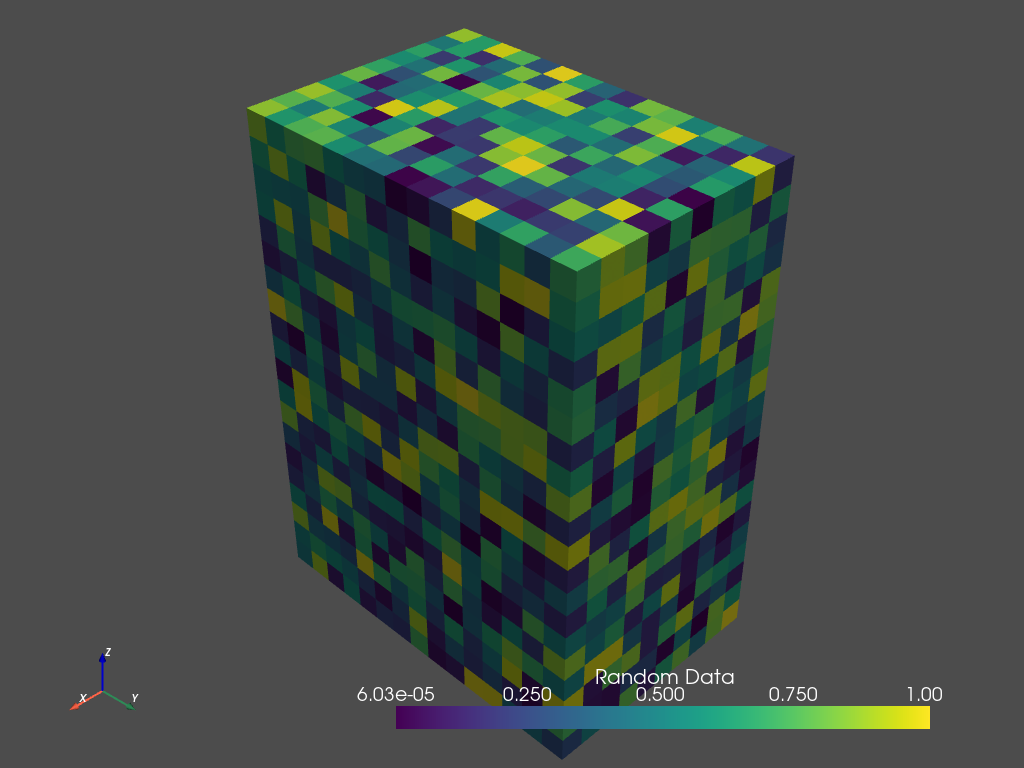

[(45.03185439655388, 47.53185439655388, 30.03185439655388),
 (15.0, 17.5, 0.0),
 (0.0, 0.0, 1.0)]

In [24]:
vol.plot()

In [40]:
import pyvistaqt as pvq

In [41]:
pq= pvq.BackgroundPlotter(window_size=[640,640])

# Add our datasets
pq.add_mesh(vol, cmap='gist_earth', opacity=0.5)
pq.add_mesh(rl, color='blue', line_width=3)
pq.add_mesh(tsf, color='yellow', opacity=0.6)
pq.add_mesh(gsf, color='yellow', opacity=0.6)
pq.add_mesh(rp, color='yellow', opacity=0.6)
# Add the volumetric dataset with a thresholding tool
pq.add_mesh_threshold(vol)
# Add the bounds axis
pq.show_bounds()
pq.show()
